In [41]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import pandas as pd
import os
import numpy as np
import glob
import scipy
import re
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as mticker


In [42]:
##### folder name
uni = "vtx_infpadding_1_128_8_256_100_7l_mu_v2_all_energy"  

##### load prediction result
path = "/home/chyoo/work/KNO_reconstruction/KNO_reconstruction/result_*/"+uni +"/"+uni +".csv"
pred_path = glob.glob(path)
pred_list = [file for file in pred_path if file.endswith(".csv")]
df = pd.read_csv(pred_list[0])


##### load energy label
path_name = "/home/chyoo/work/KNO_reconstruction/KNO_reconstruction/result_*/"+uni +"/name_"+uni +".csv"
pred_path_name = glob.glob(path_name)
pred_list_name = [file for file in pred_path_name if file.endswith(".csv")]
df2 = pd.read_csv(pred_list_name[0])

In [43]:
pred = np.array(df['prediction']).reshape(-1,3)
label = np.array(df['label']).reshape(-1,3)
fname = np.array(df2['fname']).reshape(-1,1)


In [44]:
#### extract energy label
pattern = re.compile(r'(\d+)MeV')
fnames = []
for row in fname:
    name = row[0] if isinstance(row, (list, np.ndarray)) else row
    match = pattern.search(name)
    if match:
        fnames.append(match.group(1))  
fnames = np.array(fnames, dtype=int)


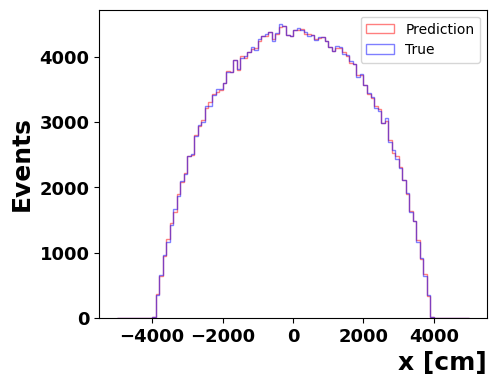

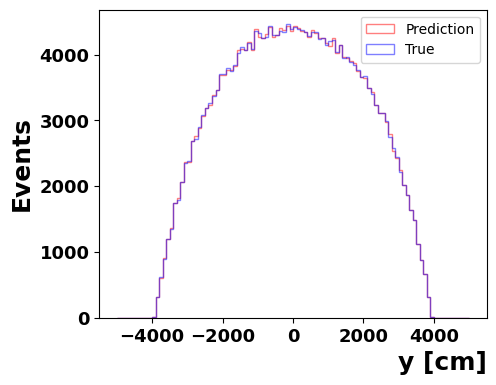

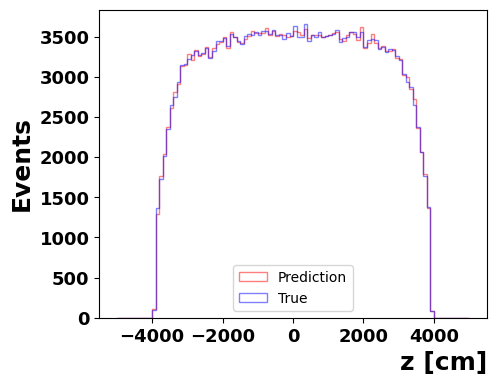

In [45]:
dpi=100 #### for save high resolution plot change dpi to 300
fig_size = (5, 4)

plt.figure(figsize=fig_size,dpi=dpi)
plt.hist(pred[:,0], bins = 100, range = [-5000,5000], color= 'r', alpha = 0.5, density = False, histtype = 'step',label = 'Prediction')
plt.hist(label[:,0], bins = 100, range = [-5000,5000], color= 'b', alpha = 0.5, density = False, histtype = 'step',label = 'True')


# plt.title('vertex X',fontsize = 25)
plt.xticks(fontsize = 13, fontweight='bold')
plt.yticks(fontsize = 13, fontweight='bold')
plt.xlabel("x [cm]", fontsize=18, loc='right', fontweight='bold')
plt.ylabel('Events',fontsize=18, fontweight='bold')
plt.legend()
# plt.savefig("VTX_x.png", dpi=dpi, bbox_inches="tight")
plt.show()



plt.figure(figsize=fig_size,dpi=dpi)
plt.hist(pred[:,1], bins = 100, range = [-5000,5000], color= 'r', alpha = 0.5, density = False, histtype = 'step',label = 'Prediction')
plt.hist(label[:,1], bins = 100, range = [-5000,5000], color= 'b', alpha = 0.5, density = False, histtype = 'step',label = 'True')


# plt.title('vertex X',fontsize = 25)
plt.xticks(fontsize = 13, fontweight='bold')
plt.yticks(fontsize = 13, fontweight='bold')
plt.xlabel("y [cm]", fontsize=18, loc='right', fontweight='bold')
plt.ylabel('Events',fontsize=18, fontweight='bold')
plt.legend()
# plt.savefig("VTX_y.png", dpi=dpi, bbox_inches="tight")
plt.show()


plt.figure(figsize=fig_size,dpi=dpi)
plt.hist(pred[:,2], bins = 100, range = [-5000,5000], color= 'r', alpha = 0.5, density = False, histtype = 'step',label = 'Prediction')
plt.hist(label[:,2], bins = 100, range = [-5000,5000], color= 'b', alpha = 0.5, density = False, histtype = 'step',label = 'True')


# plt.title('vertex X',fontsize = 25)
plt.xticks(fontsize = 13, fontweight='bold')
plt.yticks(fontsize = 13, fontweight='bold')
plt.xlabel("z [cm]", fontsize=18, loc='right', fontweight='bold')
plt.ylabel('Events',fontsize=18, fontweight='bold')
plt.legend()
# plt.savefig("VTX_z.png", dpi=dpi, bbox_inches="tight")
plt.show()




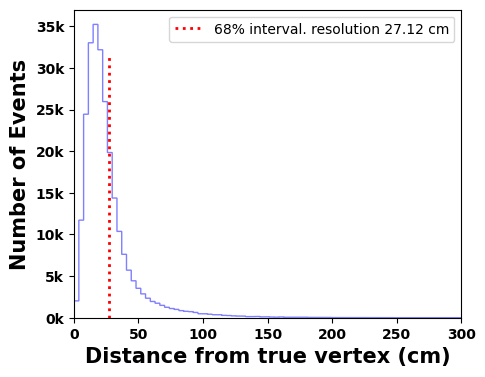

In [46]:
dpi=100 #### for save high resolution plot change dpi to 300
fig_size = (5, 4)

plt.figure(figsize=fig_size, dpi=dpi)
bins = 1000
all_hist = (pred[:,0] - label[:,0])**2 + (pred[:,1] - label[:,1])**2 + (pred[:,2] - label[:,2])**2

plt.hist(np.sqrt(all_hist), bins=bins, color='b', alpha=0.5, density=False, histtype='step')

plt.axvline(
    np.sort(np.sqrt(all_hist))[int(np.sqrt(all_hist).shape[0] * 0.68)], 
    0, 0.85, color='red', linestyle='dotted', linewidth=2, 
    label=f'68% interval. resolution {np.sort(np.sqrt(all_hist))[int(np.sqrt(all_hist).shape[0] * 0.68)]:.2f} cm'
)

# Formatting for ticks and labels
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.xlabel('Distance from true vertex (cm)', fontsize=15, fontweight='bold')
plt.ylabel('Number of Events', fontsize=15, fontweight='bold')

# Set y-axis format to display in "k" format
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

plt.legend(fontsize=10, loc='upper right')
plt.xlim([0,300])
# Automatically adjust ylim
plt.ylim(auto=True)

# plt.savefig("VTX_toatl_res.png", dpi=dpi, bbox_inches="tight")
plt.show()

In [47]:
##### For calculate the resolution of each energy
##### If you want to see each plot, you can modify the plt.show()
resolutions = []
energys = []
for energy in range(200,1050,50):
    bins = 200
    energys.append(energy)
    all_hist = (pred[:,0][fnames.reshape(-1)==energy] - label[:,0][fnames.reshape(-1)==energy])**2+(pred[:,0][fnames.reshape(-1)==energy] - label[:,0][fnames.reshape(-1)==energy])**2+(pred[:,0][fnames.reshape(-1)==energy] - label[:,0][fnames.reshape(-1)==energy])**2


    plt.hist(np.sqrt(all_hist),bins = bins, color= 'b', alpha = 0.5, density = False, histtype = 'step')


    plt.axvline(np.sort(np.sqrt(all_hist))[int(np.sqrt(all_hist).shape[0]*(0.68))], 0, 0.85, color='red', linestyle='dotted', linewidth=2, label=f'68% interval. resolution {np.sort(np.sqrt(all_hist))[int(np.sqrt(all_hist).shape[0]*(0.68))]:.2f} cm')

    resolutions.append(np.sort(np.sqrt(all_hist))[int(np.sqrt(all_hist).shape[0]*(0.68))])
    # plt.title('Histogram of distance from true vertex',fontsize = 15)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    # plt.xlabel("??", fontsize=10, loc='right')
    plt.xlim([0,300])
    plt.xlabel('Distance from true vertex (cm)',fontsize=15)
    plt.ylabel('Number of Events',fontsize=15)
    plt.legend(fontsize=13,loc='upper right')
    # plt.ylim([0,15000])
    # print(energy)
    # plt.show()
    plt.close()


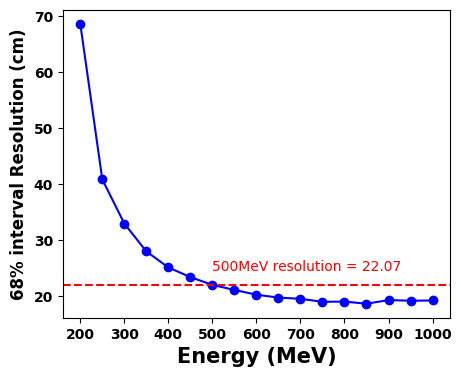

In [48]:
dpi=100 #### for save high resolution plot change dpi to 300
fig_size = (5, 4)

plt.figure(figsize=fig_size, dpi=dpi)
plt.plot(energys,resolutions,'o-b')
plt.axhline(np.array(resolutions)[np.array(energys)==500], color='red', linestyle='--')
plt.text(500, np.array(resolutions)[np.array(energys) == 500]+2, '500MeV resolution = '+f"{np.array(resolutions)[np.array(energys) == 500][0]:.2f}", color='red', verticalalignment='bottom', horizontalalignment='left')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.xlabel('Energy (MeV)',fontsize=15, fontweight='bold')
plt.ylabel('68% interval Resolution (cm)',fontsize=12, fontweight='bold')

# plt.savefig("VTX_energy_res.png", dpi=dpi, bbox_inches="tight")
plt.show()